In [5]:
import os, shutil
import numpy as np

# This script is to create and submit mulctiple Sw calculations
work_dir='/glade/u/home/hongli/scratch/2020_11_29discretization_error/discretize/yampa'
script_dir='/glade/u/home/hongli/github/2020_11_29discretization_error/radiation_wind_functions'
script_file='step8_raw_Sw_function.py'
raster_dir=work_dir

# =======================input and output =============================
dem_raster='dem_crop.tif'
slp_raster='slope_crop.tif'
asp_raster='aspect_crop.tif'
opath=os.path.join(work_dir, 'step8_raw_Sw')
if not os.path.exists(opath):
    os.makedirs(opath)
command_folder=os.path.join(work_dir, 'step8_raw_Sw_command')
if os.path.exists(command_folder):
    shutil.rmtree(command_folder) 
os.makedirs(command_folder)
shutil.copyfile(os.path.join(script_dir, script_file), os.path.join(command_folder,script_file))

# ==========================================================================
first_day = 75   # March 15 (temperature >0)
last_day = 167   # June 15 (snowpack disappears)
ndays = last_day-first_day+1
Sw_nodata=-9999

os.chdir(command_folder)
# for i in np.arange(1):
for i in np.arange(ndays):
    DOY = first_day+i
    print('day'+str(i)+', DOY'+str(DOY))

    # create command file
    command_file='qsub_DOY'+str(DOY)+'.sh'
    command_file_path = os.path.join(command_folder,command_file)
    if os.path.exists(command_file_path):
        os.remove(command_file_path)

    with open(command_file_path,'w') as f:
        f.write('#!/bin/bash\n')
        f.write('#PBS -N SwDOY'+str(DOY)+'\n')
        f.write('#PBS -A P48500028\n')
        f.write('#PBS -q regular\n')
        f.write('#PBS -l walltime=00:15:00\n')
        f.write('#PBS -l select=1:ncpus=1:mpiprocs=1\n') 
        f.write('#PBS -j oe\n\n')
        f.write('export TMPDIR=/glade/scratch/hongli/temp\n')
        f.write('mkdir -p $TMPDIR\n\n')         
        f.write('module load peak_memusage\n\n') # monitor peak memory usage   
        # Note: cheyenne usable memory per compute node is 45GB.
        
        f.write('peak_memusage.exe /glade/u/home/hongli/tools/miniconda3/envs/conda_hongli/bin/python '\
                +os.path.join(command_folder,script_file)+' '+raster_dir+' '\
                +dem_raster+' '+slp_raster+' '+asp_raster+' '+str(DOY)+' '+opath+' '+dem_raster)
#         f.write('peak_memusage.exe python '+os.path.join(command_folder,script_file)+' '+raster_dir+' '\
#                 +dem_raster+' '+slp_raster+' '+asp_raster+' '+str(DOY)+' '+opath)

    # submit job
    os.system('chmod 740 '+command_file)
    os.system('qsub '+command_file)

os.chdir(work_dir)        
print('Done')

day0, DOY75
day1, DOY76
day2, DOY77
day3, DOY78
day4, DOY79
day5, DOY80
day6, DOY81
day7, DOY82
day8, DOY83
day9, DOY84
day10, DOY85
day11, DOY86
day12, DOY87
day13, DOY88
day14, DOY89
day15, DOY90
day16, DOY91
day17, DOY92
day18, DOY93
day19, DOY94
day20, DOY95
day21, DOY96
day22, DOY97
day23, DOY98
day24, DOY99
day25, DOY100
day26, DOY101
day27, DOY102
day28, DOY103
day29, DOY104
day30, DOY105
day31, DOY106
day32, DOY107
day33, DOY108
day34, DOY109
day35, DOY110
day36, DOY111
day37, DOY112
day38, DOY113
day39, DOY114
day40, DOY115
day41, DOY116
day42, DOY117
day43, DOY118
day44, DOY119
day45, DOY120
day46, DOY121
day47, DOY122
day48, DOY123
day49, DOY124
day50, DOY125
day51, DOY126
day52, DOY127
day53, DOY128
day54, DOY129
day55, DOY130
day56, DOY131
day57, DOY132
day58, DOY133
day59, DOY134
day60, DOY135
day61, DOY136
day62, DOY137
day63, DOY138
day64, DOY139
day65, DOY140
day66, DOY141
day67, DOY142
day68, DOY143
day69, DOY144
day70, DOY145
day71, DOY146
day72, DOY147
day73, DOY148

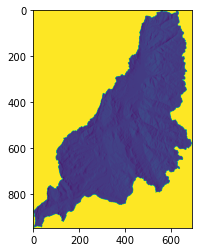

In [2]:
import rasterio as rio
import matplotlib.pyplot as plt 
sw_file ='/glade/u/home/hongli/scratch/2020_11_29discretization_error/discretize/yampa/step8_raw_Sw/sw_DOY75.tif'

with rio.open(sw_file) as ff:
    in_raster_value  = ff.read(1)
    in_raster_mask = ff.read_masks(1)
    out_meta = ff.meta.copy()
plt.imshow(in_raster_value)

In [3]:
in_raster_value

array([[1367.        , 1367.        , 1367.        , ..., 1367.        ,
        1367.        , 1367.        ],
       [1367.        , 1367.        , 1367.        , ..., 1367.        ,
        1367.        , 1367.        ],
       [1367.        , 1367.        , 1367.        , ..., 1367.        ,
        1367.        , 1367.        ],
       ...,
       [1367.        , 1367.        ,  241.89291308, ..., 1367.        ,
        1367.        , 1367.        ],
       [1367.        ,  236.10619075, 1367.        , ..., 1367.        ,
        1367.        , 1367.        ],
       [1367.        , 1367.        , 1367.        , ..., 1367.        ,
        1367.        , 1367.        ]])

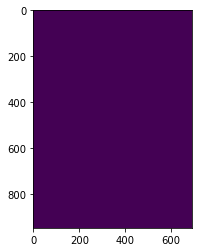

In [28]:
plt.imshow(in_raster_mask)

In [5]:
np.shape(gt)

(9,)